# REGRESSION LINEAIRE SIMPLE

2 Datasets de données qui ont collectés, puis nettoyées:
- nombre followers avant et apres periode
- likes de posts (moyenne de 3 posts) selon le nombre de followers

le but est d'avoir une equation de droite qui permet de predire:
- le nombre de followers dans une periode
- le nombre de likes moyen par post 


# FOLLOWERS WIN

In [614]:
%matplotlib inline

#imports
from numpy import *
import matplotlib.pyplot as plt
#import pandas as pd 

#### Import the data
Here, we're using a dataset with two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [615]:
points = genfromtxt('challenge_dataset.csv', delimiter=',')

#data = pd.read_csv("challenge_dataset.csv") 
# Preview the first 5 lines of the loaded data 
#data.head()

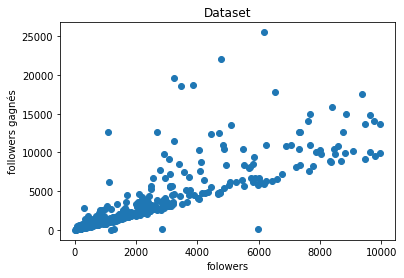

In [616]:

#Extract columns
x = array(points[:,0])
y = array(points[:,1])


#Plot the dataset
plt.scatter(x,y)
plt.xlabel('folowers')
plt.ylabel('followers gagnés')
plt.title('Dataset')
plt.show()

#### Defining the hyperparamters

In [623]:
#hyperparamters
learning_rate = 0.00000001
initial_b = 0
initial_m = 0
num_iterations = 20

#### Define cost function

In [624]:
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    #Compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    #Return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [625]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    
    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    #Calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    #Update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    #Return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [626]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.00031263764800202893
Optimized m: 1.3130548166282545
Minimized cost: 2922215.518929477


#### Plotting the cost per iterations

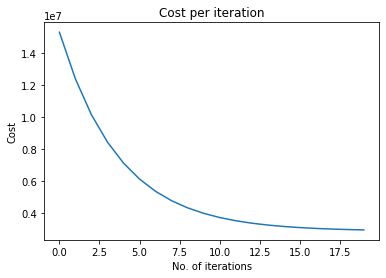

In [627]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

Gradient descent converges to local minimum after 5 iterations

#### Plot line of best fit

1.3130548166282545
0.00031263764800202893


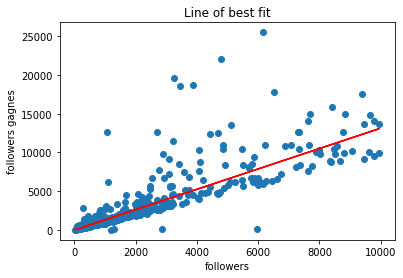

In [628]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
print(m)
#print(x)
print(b)

#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('followers')
plt.ylabel('followers gagnes')
plt.title('Line of best fit')
plt.show()

In [ ]:
#### RESULTAT EQUATION DROITE

In [629]:
print ("{:f} * Nb Abonnes + {:f}  ".format(m, b))


EQUATION FOLLOWERS GAGNES EN 6 MOIS:
1.313055 * Nb Abonnes + 0.000313  


# LIKES/POST WIN

In [631]:
#hyperparamters
learning_rate = 0.00000001
initial_b = 0
initial_m = 0
num_iterations = 100

In [632]:
points = genfromtxt('likesmoy2.csv', delimiter=',')

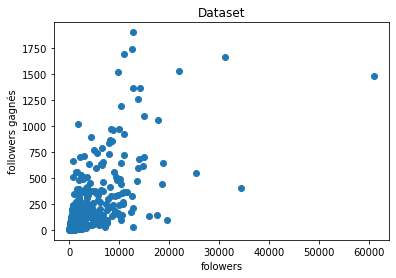

In [633]:
#Extract columns
x = array(points[:,0])
y = array(points[:,1])


#Plot the dataset
plt.scatter(x,y)
plt.xlabel('folowers')
plt.ylabel('followers gagnés')
plt.title('Dataset')
plt.show()

In [634]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 7.970701136046471e-05
Optimized m: 0.04292576855204564
Minimized cost: 32101.23564771932


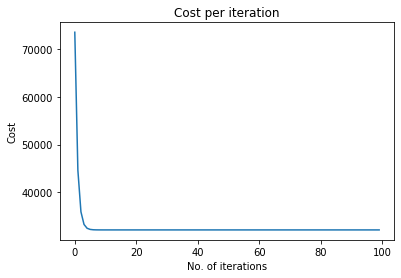

In [635]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

0.04292576855204564
7.970701136046471e-05


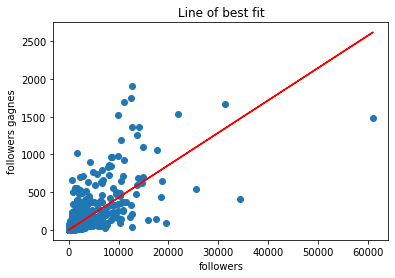

In [636]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
print(m)
#print(x)
print(b)

#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('followers')
plt.ylabel('followers gagnes')
plt.title('Line of best fit')
plt.show()

#### RESULTAT EQUATION DROITE

In [637]:
print ("{:f} * Nb Abonnes + {:f}  ".format(m, b))

EQUATION LIKES PAR POST:
0.042926 * Nb Abonnes + 0.000080  
